In [5]:
import torch

x_train = torch.FloatTensor([[1], [2], [3], [4], [5], [2.5], [3.5], [0], [3.1],[2.7], [2.8], [2.9]])
y_train = torch.FloatTensor([[1], [1], [1], [0], [0], [0], [0], [1], [0], [1], [1], [1]])

In [6]:
#mse = torch.nn.MSELoss() linear regression의 cost함수도 내장 함수로 가능
#bce = torch.nn.BCELoss()

#w,b 초기화 및 learning rate 설정
w = torch.randn(1,1)
b = torch.randn(1,1)

lr = 1.0

for epoch in range(3001):
    #w, b 로 미분할 것이다
    w.requires_grad_(True) # w.grad = 0
    b.requires_grad_(True) # b.grad = 0

    h = torch.sigmoid(x_train @ w + b) # 시그모이드 함수에 이전 가설 함수를 넣어 logistic regression 구현
    cost = torch.mean(-y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h)) #BCE, y가 0 또는 1 일때 코스트 함수
    #cost = bce(h, y_train) #내장 함수 사용해도 됨

    cost.backward() #기울기(경사) 계산

    with torch.no_grad(): #경사하강법
      w = w - lr * w.grad
      b = b - lr * b.grad

      if epoch % 100 == 0:
        print('epoch: {}, cost: {:.6f}, w: {:.6f}, b: {:.6f}'.format(epoch, cost.item(), w.item(), b.item())) #item() 함수는 scalar 값 얻을 수 있음



epoch: 0, cost: 0.580777, w: -0.577308, b: 1.175359
epoch: 100, cost: 0.416301, w: -1.515063, b: 4.602992
epoch: 200, cost: 0.397496, w: -1.934574, b: 5.883523
epoch: 300, cost: 0.390268, w: -2.198725, b: 6.683256
epoch: 400, cost: 0.386718, w: -2.385099, b: 7.245091
epoch: 500, cost: 0.384757, w: -2.524120, b: 7.663062
epoch: 600, cost: 0.383598, w: -2.631303, b: 7.984725
epoch: 700, cost: 0.382880, w: -2.715755, b: 8.237843
epoch: 800, cost: 0.382422, w: -2.783323, b: 8.440155
epoch: 900, cost: 0.382122, w: -2.837986, b: 8.603708
epoch: 1000, cost: 0.381923, w: -2.882585, b: 8.737071
epoch: 1100, cost: 0.381789, w: -2.919212, b: 8.846544
epoch: 1200, cost: 0.381698, w: -2.949448, b: 8.936880
epoch: 1300, cost: 0.381635, w: -2.974509, b: 9.011733
epoch: 1400, cost: 0.381592, w: -2.995347, b: 9.073960
epoch: 1500, cost: 0.381562, w: -3.012727, b: 9.125846
epoch: 1600, cost: 0.381541, w: -3.027247, b: 9.169190
epoch: 1700, cost: 0.381526, w: -3.039403, b: 9.205472
epoch: 1800, cost: 0.3

In [10]:
#새로운 입력에 대한 결과 예측
x_test = torch.FloatTensor([[4.5],[1.1]])

test_result = torch.sigmoid(x_test @ w + b)

print(torch.round(test_result))#반올림하여 0 또는 1로


tensor([[0.],
        [1.]])


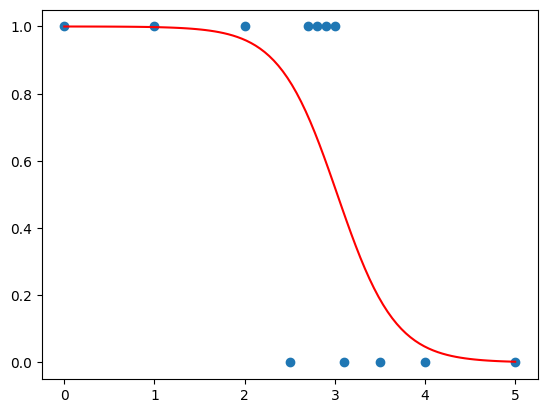

In [14]:
#Logistic regression 시각화
import matplotlib.pyplot as plt

X = torch.linspace(0, 5, 100).unsqueeze(1)
Y = torch.sigmoid(X @ w + b)

plt.scatter(x_train, y_train)
plt.plot(X, Y, c="red")
plt.show()

In [15]:
#Optimizer 사용해보기
#Optimizer는 직접 구현한 GD를 미리 구현된 pytorch의 모듈로서 사용
w = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

optimizer = torch.optim.SGD([w,b], lr=1.0)

for epoch in range(3001):

    h = torch.sigmoid(x_train @ w + b)
    cost = torch.mean(-y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h))

    optimizer.zero_grad() #기울기 초기화
    cost.backward()
    optimizer.step() #GD

    with torch.no_grad():
      if epoch % 100 == 0:
        print('epoch: {}, cost: {:.6f}, w: {:.6f}, b: {:.6f}'.format(epoch, cost.item(), w.item(), b.item())) #item() 함수는 scalar 값 얻을 수 있음



epoch: 0, cost: 2.290935, w: -0.538039, b: 1.621549
epoch: 100, cost: 0.415237, w: -1.533376, b: 4.659206
epoch: 200, cost: 0.397149, w: -1.945160, b: 5.915660
epoch: 300, cost: 0.390110, w: -2.205925, b: 6.704996
epoch: 400, cost: 0.386634, w: -2.390362, b: 7.260931
epoch: 500, cost: 0.384709, w: -2.528126, b: 7.675095
epoch: 600, cost: 0.383568, w: -2.634433, b: 7.994112
epoch: 700, cost: 0.382861, w: -2.718244, b: 8.245298
epoch: 800, cost: 0.382410, w: -2.785326, b: 8.446151
epoch: 900, cost: 0.382114, w: -2.839614, b: 8.608577
epoch: 1000, cost: 0.381918, w: -2.883919, b: 8.741056
epoch: 1100, cost: 0.381786, w: -2.920312, b: 8.849832
epoch: 1200, cost: 0.381695, w: -2.950358, b: 8.939599
epoch: 1300, cost: 0.381634, w: -2.975264, b: 9.013988
epoch: 1400, cost: 0.381591, w: -2.995977, b: 9.075840
epoch: 1500, cost: 0.381561, w: -3.013247, b: 9.127401
epoch: 1600, cost: 0.381540, w: -3.027684, b: 9.170494
epoch: 1700, cost: 0.381526, w: -3.039769, b: 9.206562
epoch: 1800, cost: 0.3

In [17]:
#Sklearn을 이용한 Logistic Regression
from sklearn.linear_model import LogisticRegression

x_train = [[1], [2], [3], [4], [5], [2.5], [3.5], [0], [3.1],[2.7], [2.8], [2.9]]
y_train = [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1] #입력 shpae가 pytorch와 다름

model = LogisticRegression(penalty= None) #penalty (or regularization)은 추후 추천 시스템때 설명, None == regularzation 사용안함
model.fit(x_train, y_train)

#w와 b에 해당하는 값을 출력
print(model.coef_, model.intercept_)

#새로운 입력(x)에 대한 결과(y) 예측
x_test = [[4.5], [1.1]]
print(model.predict(x_test))

[[-3.10385806]] [9.39776831]
[0 1]
